# Classification of Relationship Status

This project focuses on an OKCupid dataset that contains information on users, such as their education, location and height. The purpose of this project is to build, train, and develop a machine learning model that can accurately predict the relationship status of the users based on their personal information. 

The dataset is provided by Codecademy as the portfolio project for the Data Scientist: Machine Learning Career Path. We will be using Python and various tools such as machine learning algorithms, preprocessing and pipelines to create our model. 

## Import Libraries 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('profiles.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


This dataset contains 59946 rows and 31 columns containing information about each individual on the OKCupid website. All of the columns except age, income, last online, location, orientation, sex and status have null values. 

Here's a quick summary of the columns:

- **age**: Age of individual
- **body_type**: General shape or figure of individual
- **diet**: Diet of individual
- **drinks**: Whether the individual consumes alcohol and/or how often
- **drugs**: Whether the individual partakes in recreational drugs
- **education**: Highest level of education
- **essays**: Descriptions of individual
- **ethnicity**: Ethnicity of individual
- **height**: Height of individual (inches)
- **income**: Annual income of individual ($US dollars)
- **job**: Current job or industry of work       
- **last_online**: When the individual was last seen online on OKCupid
- **location**: Current location of residence     
- **offspring**: Whether the individual has children and preferences on having offspring   
- **orientation**: Sexual orientaiton of individual
- **pets**: Pet preferences        
- **religion**: Religion of individual    
- **sex**: Gender of individual
- **sign**: Astrological sign of individual       
- **smokes**: Whether the individual smokes       
- **speaks**: Languages spoken by individual     
- **status**: Current relationship status

## Data Cleaning and Preparation

We will first remove the essay columns since it is difficult to extract valueable information from these columns. In addition, we will remove the last online column. 

In [3]:
# Removing essay columns
df = df.drop(columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'last_online'])

### Dealing with Null Values

We will use forward filling to replace null values with the previous non-null value. 

In [4]:
# Finding columns that contain null values
null_columns = df.isnull().any(axis = 0).rename_axis('column name')
null_columns

column name
age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
ethnicity       True
height          True
income         False
job             True
location       False
offspring       True
orientation    False
pets            True
religion        True
sex            False
sign            True
smokes          True
speaks          True
status         False
dtype: bool

In [5]:
# Forward filling
ffill_columns = np.array(df.drop(columns = ['age', 'income', 'location', 'orientation', 'sex', 'status']).columns)

for i in ffill_columns:
    df[i].fillna(method = 'ffill', inplace = True)

For the offspring and sign columns, there are values with typos in them so we will correct them.

In [6]:
# Replacing sub-substrings
df.offspring = df.offspring.str.replace('doesn&rsquo;t', 'does not', regex = False)
df.sign = df.sign.str.replace('doesn&rsquo;t', 'does not', regex = False)
df.sign = df.sign.str.replace('it&rsquo;s', 'it is', regex = False)

## Feature Engineering

### Frequency Encoding

Now, we will perform feature engineering on several columns. Firstly, we will use frequency encoding on columns that have numerous meaningful values. This preserves valueable info and reduces dimensionality during model fitting. 

#### Body Type

In [7]:
# Initial body type value count
df.body_type.value_counts()

body_type
average           16085
fit               13911
athletic          12952
thin               5161
curvy              4322
a little extra     2882
skinny             1948
full figured       1106
overweight          499
jacked              473
used up             392
rather not say      215
Name: count, dtype: int64

In [8]:
# Frequency encoding 
frequency_map_body = df['body_type'].value_counts().to_dict()
df['encoded_body_type'] = df['body_type'].map(frequency_map_body)

#### Ethnicity

In [9]:
# Initial ethnicity value count
df.ethnicity.value_counts().head()

ethnicity
white               36282
asian                6763
hispanic / latin     3103
black                2226
other                1886
Name: count, dtype: int64

In [10]:
# Frequency encoding
frequency_map_ethnicity = df['ethnicity'].value_counts().to_dict()
df['encoded_ethnicity'] = df['ethnicity'].map(frequency_map_ethnicity)

#### Offspring

In [11]:
# Initial offspring value count
df.offspring.value_counts().reset_index()

,offspring,count
0,does not have kids,18403
1,"does not have kids, but might want them",9479
2,"does not have kids, but wants them",9048
3,does not want kids,7189
4,has kids,4590
5,has a kid,4573
6,"does not have kids, and does not want any",2737
7,"has kids, but does not want more",1133
8,"has a kid, but does not want more",657
9,"has a kid, and might want more",582


In [12]:
# Frequency encoding
frequency_map_offspring = df['offspring'].value_counts().to_dict()
df['encoded_offspring'] = df['offspring'].map(frequency_map_offspring)

### Location

For location, we will narrow our location to individuals in the California area first before performing frequency encoding. 

In [13]:
# Initial location value count
df.location.value_counts().reset_index().head()

,location,count
0,"san francisco, california",31064
1,"oakland, california",7214
2,"berkeley, california",4212
3,"san mateo, california",1331
4,"palo alto, california",1064


In [14]:
# Filtering location to california only
df = df[df.location.str.contains('california')]

# Removing unnecessary string
df.location = df.location.str.replace(', california', '', regex = False)

# Frequency encoding
frequency_map_location = df.location.value_counts().to_dict()
df['encoded_location'] = df.location.map(frequency_map_location)

### Reducing categories

Next, we will reduce the number of categories in certain columns into only a few meaningful groups. This simplifies the model by reducing complexity and improves interpretability when model fitting. 

### Education

In [15]:
# Initial education value count
df.education.value_counts().reset_index().head()

,education,count
0,graduated from college/university,26915
1,graduated from masters program,10002
2,working on college/university,6456
3,working on masters program,1859
4,graduated from two-year college,1721


In [16]:
# Removing unnecessary substrings
df.education = df.education.str.replace('graduated from ', '', regex = False)
df.education = df.education.str.replace('working on ', '', regex = False)
df.education = df.education.str.replace('dropped out of ', '', regex = False)
df.education.value_counts()

education
college/university    35391
masters program       12164
two-year college       3389
ph.d program           2708
high school            1937
space camp             1918
law school             1587
med school              761
Name: count, dtype: int64

### Diet

In [17]:
# Initial diet value count
df.diet.value_counts().reset_index()

,diet,count
0,mostly anything,27704
1,anything,10523
2,strictly anything,8690
3,mostly vegetarian,5736
4,mostly other,1685
5,strictly vegetarian,1507
6,vegetarian,1098
7,strictly other,790
8,other,613
9,mostly vegan,561


In [18]:
# Removing unnecessary substrings
df.diet = df.diet.str.replace('mostly ', '', regex = False)
df.diet = df.diet.str.replace('strictly ', '', regex = False)
df.diet.value_counts()

diet
anything      46917
vegetarian     8341
other          3088
vegan          1189
kosher          190
halal           130
Name: count, dtype: int64

### Religion

In [19]:
# Initial religion value count
df.religion.value_counts().reset_index().head()

,religion,count
0,agnosticism,4111
1,other,4040
2,agnosticism but not too serious about it,3901
3,agnosticism and laughing about it,3700
4,catholicism but not too serious about it,3528


In [20]:
# Replacing unnecessary substrings
df.religion = df.religion.str.replace('but not too serious about it', '', regex = False)
df.religion = df.religion.str.replace('and laughing about it', '', regex = False)
df.religion = df.religion.str.replace('and somewhat serious about it', '', regex = False)
df.religion = df.religion.str.replace('and very serious about it', '', regex = False)

# Removing white spaces 
df.religion = df.religion.str.strip()

### Sign

In [21]:
# Initial sign value count
df.sign.value_counts().reset_index().head()

,sign,count
0,scorpio and it is fun to think about,2171
1,gemini and it is fun to think about,2154
2,leo and it is fun to think about,2065
3,libra and it is fun to think about,2010
4,taurus and it is fun to think about,1980


In [22]:
# Replacing unnecessary substrings
df.sign = df.sign.str.replace(' but it does not matter', '', regex = False)
df.sign = df.sign.str.replace(' and it matters a lot', '', regex = False)
df.sign = df.sign.str.replace(' and it is fun to think about', '', regex = False)

### Height

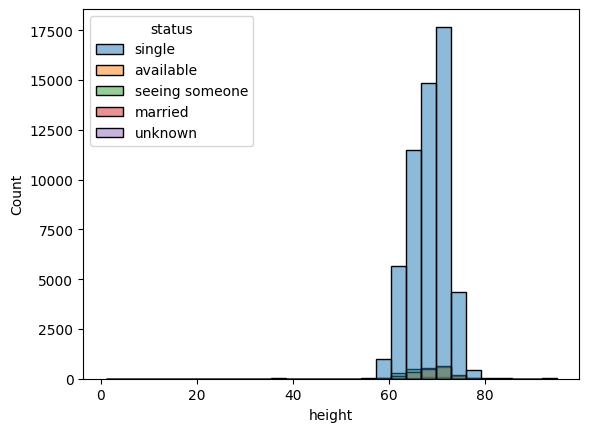

In [23]:
sns.histplot(data = df, x = 'height', hue = 'status', bins = 30)
plt.show()

In [24]:
# Initial height value count
heights = df.height.value_counts().reset_index().sort_values(by = 'height', ascending = True).head(10)
heights

,height,count
41,1.0,1
55,3.0,1
59,4.0,1
52,6.0,1
56,8.0,1
46,9.0,1
44,26.0,1
28,36.0,11
38,37.0,2
53,42.0,1


There seems to be some outliers in the height column. We will replace these values with the mode value. 

In [25]:
# Replacing outliers
height_to_replace = [1,3,4,6,8,9,26]

for height in height_to_replace:
    df.height = df.height.replace({height:df.height.mode()[0]})

### Job & Income

In [26]:
# Initial income value count
df.income.value_counts().reset_index()

,income,count
0,-1,48366
1,20000,2946
2,100000,1621
3,80000,1111
4,30000,1047
5,40000,1003
6,50000,975
7,60000,733
8,70000,707
9,150000,629


We will replace individuals with -1 income to 0. 

In [27]:
# Replacing -1 to 0 
df.income.replace({-1:0}, inplace = True)

In [28]:
df[df.job == 'unemployed'].head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,religion,sex,sign,smokes,speaks,status,encoded_body_type,encoded_ethnicity,encoded_offspring,encoded_location
121,50,fit,anything,socially,never,two-year college,white,75.0,0,unemployed,...,christianity,m,gemini,no,"english (fluently), tagalog (poorly)",single,13911,36282,4590,558
488,24,average,anything,socially,never,college/university,white,72.0,20000,unemployed,...,buddhism,f,taurus,no,"english (fluently), spanish (okay)",single,16085,36282,9048,31064
489,49,average,anything,socially,never,college/university,white,70.0,0,unemployed,...,atheism,m,cancer,no,english,single,16085,36282,9048,7214
701,28,average,vegetarian,socially,sometimes,two-year college,asian,67.0,0,unemployed,...,agnosticism,m,aries,yes,"english (fluently), chinese (fluently), thai (...",single,16085,6763,1133,31064
937,23,average,vegetarian,rarely,sometimes,two-year college,white,71.0,1000000,unemployed,...,agnosticism,m,gemini,no,english,available,16085,36282,2737,7214


There are individuals who are unemployed and have an income more than 0. We will replace their incomes to 0 as well. 

In [29]:
df.loc[df['job'] == 'unemployed', 'income'] = 0

### Language

In [30]:
# Initial speaks value count 
df.speaks.value_counts().head(10)

speaks
english                                   21813
english (fluently)                         6628
english (fluently), spanish (poorly)       2058
english (fluently), spanish (okay)         1919
english (fluently), spanish (fluently)     1288
english, spanish                            859
english (fluently), french (poorly)         756
english, spanish (okay)                     654
english, spanish (poorly)                   610
english (fluently), chinese (fluently)      534
Name: count, dtype: int64

In [31]:
# Removing unnecessary substrings
df.speaks = df.speaks.str.replace(' (fluently)', '', regex = False)
df.speaks = df.speaks.str.replace(' (poorly)', '', regex = False)
df.speaks = df.speaks.str.replace(' (okay)', '', regex = False)

In [32]:
# Changing values to number of languages spoken by individuals
df['speaks_count'] = df['speaks'].str.count(',') + 1
df.speaks_count.value_counts()

speaks_count
1    29057
2    17225
3     8669
4     3242
5     1662
Name: count, dtype: int64

## Model Selection and Evaluation

### Feature Importances

In [33]:
# Feature and target variables
X = df.drop(columns = ['status', 'ethnicity', 'offspring', 'speaks', 'location', 'speaks'])
y = df.status

# Separating columns by data types
cat_cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'orientation', 
            'pets', 'religion', 'sex', 'sign', 'smokes']
freq_cols = ['encoded_ethnicity', 'encoded_offspring', 'encoded_location']
num_vals = ['income', 'height', 'speaks_count']

# Preprocessing 
preprocessing = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse = False, drop = 'first'), cat_cols),
        ('num', StandardScaler(), num_vals),
        ('freq', 'passthrough', freq_cols)
    ]
)

In [34]:
# Apply the transformations to the training data
X_preprocessed = preprocessing.fit_transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns = preprocessing.get_feature_names_out())

# Split the data into train and test sets
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [35]:
# Initialising RandomForestClaasifier model
classifier = RandomForestClassifier(class_weight='balanced', random_state = 42)
classifier.fit(x_train_processed, y_train_processed)

RandomForestClassifier(class_weight='balanced', random_state=42)

There is a high class imbalance in this dataset where the majority class ('single') has a much higher ratio compared to the minority class. Hence, we will use a 'balanced' class weight for our model. 

In [36]:
# Get feature importances
importances = classifier.feature_importances_

# Create a DataFrame to view feature importances
feature_importances = pd.DataFrame({'feature': x_train_processed.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print features and importances
print(feature_importances.head(15))

                                    feature  importance
91                              num__height    0.074783
94                  freq__encoded_offspring    0.060009
95                   freq__encoded_location    0.059061
92                        num__speaks_count    0.052306
93                  freq__encoded_ethnicity    0.045679
90                              num__income    0.027254
51                cat__orientation_straight    0.020286
65      cat__pets_likes dogs and likes cats    0.019121
32  cat__job_computer / hardware / software    0.018972
1                    cat__body_type_average    0.018085
22                     cat__drugs_sometimes    0.017847
81                         cat__sign_pisces    0.017808
19                     cat__drinks_socially    0.017740
74                               cat__sex_m    0.017133
3                        cat__body_type_fit    0.016665


### Predictions

In [37]:
# Predicting outcome using testing data 
y_pred = classifier.predict(x_test_processed)

# Classifier score
train_score = classifier.score(x_train_processed, y_train_processed)
test_score = classifier.score(x_test_processed, y_test_processed)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9998955809873862
Test Score: 0.9305822404143347


## Model Validation

We will validate our classification model using k-fold cross validation by splitting the training data into 5 folds and calculating the average accuracy of each fold. We will also use hyperparameter tuning to find the best hyperparameters for our model.

#### K-Fold Cross-Validation

In [38]:
# Performing k-fold cross validation
scores = cross_val_score(classifier, x_train_processed, y_train_processed, cv=5, scoring='accuracy')

# Printing average score 
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9287026954459344


From our 5-fold cross validation, we managed to get an accuracy of approximately 93%, which signifies that our model's performance is good. 

#### Hyperparameter Tuning

In [39]:
# Define parameter grid
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20],
}

# Perform grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_processed, y_train_processed)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Score: 0.9287026954459344


## Pipeline

Lastly, we will convert our workflow into a pipeline to streamline our code and ensure that it is flexible for alterations without affecting the rest of the code if required again in the future.

In [41]:
# Feature and target variables
X = df.drop(columns = ['status', 'ethnicity', 'offspring', 'speaks', 'location', 'speaks'])
y = df.status

# Separating columns by data types
cat_cols = X.select_dtypes(include = 'object').columns
freq_cols = ['encoded_ethnicity', 'encoded_offspring', 'encoded_location']
num_vals = ['income', 'height', 'speaks_count']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Preprocessing 
pipeline_preprocessing = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse = False, drop = 'first'), cat_cols),
        ('num', StandardScaler(), num_vals),
        ('freq', 'passthrough', freq_cols)
    ]
)

# Initialise classifier
pipeline_classifier = RandomForestClassifier(class_weight='balanced', random_state = 42)

# Initialise pipeline
pipeline = Pipeline([('preprocess', pipeline_preprocessing), ('classification', pipeline_classifier)])

In [42]:
# Fitting model and making predictions
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

# Pipeline score
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9998955809873862
Test Score: 0.9305822404143347


## Conclusion

This project explores a unique dataset that contains user information on the OKCupid website. The objective of this project is to develop a machine learning model that can predict the relationship status of these users based on their information. After cleaning the data and performing feature engineering, we fitted the dataset to a Random Forest Classifier model and evaluated its performance. Fortunately, the model performed really well with the dataset. We also created a pipeline to automate our workflow and make it more efficient for future use. 